## Data Handling
1. 날짜, 시계열 관련 전처리

### 1. data : 날짜, 시계열 관련 전처리 
1. year, month 를 분리하여 특성으로
2. Add Feature : 'previous interest rate'
 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
date_df_dic = {}
q1 = pd.read_csv('dataframes/selected_df_q1.csv')
q2 = pd.read_csv('dataframes/selected_df_q2.csv')
q3 = pd.read_csv('dataframes/selected_df_q3.csv')
date_df_dic['q1'] = q1
date_df_dic['q2'] = q2
date_df_dic['q3'] = q3

In [12]:
q2['date'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d')).dt.year.value_counts()


date
1959    12
2008    12
1994    12
1995    12
1996    12
        ..
1986    12
1987    12
1988    12
1989    12
2024     1
Name: count, Length: 66, dtype: int64

In [32]:
for q, df in date_df_dic.items() : 
    df['date'] = df['date'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d'))
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['previous interest rate'] = df['interest rate'].shift(1)
    df = df.fillna(method='bfill')
    date_df_dic[q] = df

date_df_dic['q2'].head()


C:\Users\Skku\AppData\Local\Temp\ipykernel_2732\3369622445.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
C:\Users\Skku\AppData\Local\Temp\ipykernel_2732\3369622445.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
C:\Users\Skku\AppData\Local\Temp\ipykernel_2732\3369622445.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


,date,CPI,CPI_yoy,CPI_mom,coreCPI,coreCPI_yoy,coreCPI_mom,PCE,corePCE,PPI,PPI_yoy,Nonfarm,industrial production,interest rate,year,month,previous interest rate
0,1959-01-01,-0.686280,-0.582361,-0.387539,-0.707911,-0.257584,-1.111179,-0.416058,-0.765994,-0.743635,-0.374436,-1.035422,-0.809954,2.48,1959,1,2.48
1,1959-02-01,-0.686344,-0.666214,-0.925723,-0.707911,-0.384491,-1.111179,-0.415661,-0.765748,-0.743635,-0.374436,-1.031570,-0.801329,2.43,1959,2,2.48
2,1959-03-01,-0.686536,-0.903867,-1.140870,-0.707281,-0.386599,0.346955,-0.415308,-0.765583,-0.743635,-0.488193,-1.025590,-0.794862,2.80,1959,3,2.43
3,1959-04-01,-0.686472,-0.974649,-0.710539,-0.707281,-0.386599,-1.111179,-0.415365,-0.765091,-0.742757,-0.374796,-1.019958,-0.785158,2.96,1959,4,2.80
4,1959-05-01,-0.686087,-0.904152,-0.172429,-0.706651,-0.262660,0.342095,-0.414922,-0.764959,-0.742757,-0.431673,-1.015757,-0.778149,2.90,1959,5,2.96


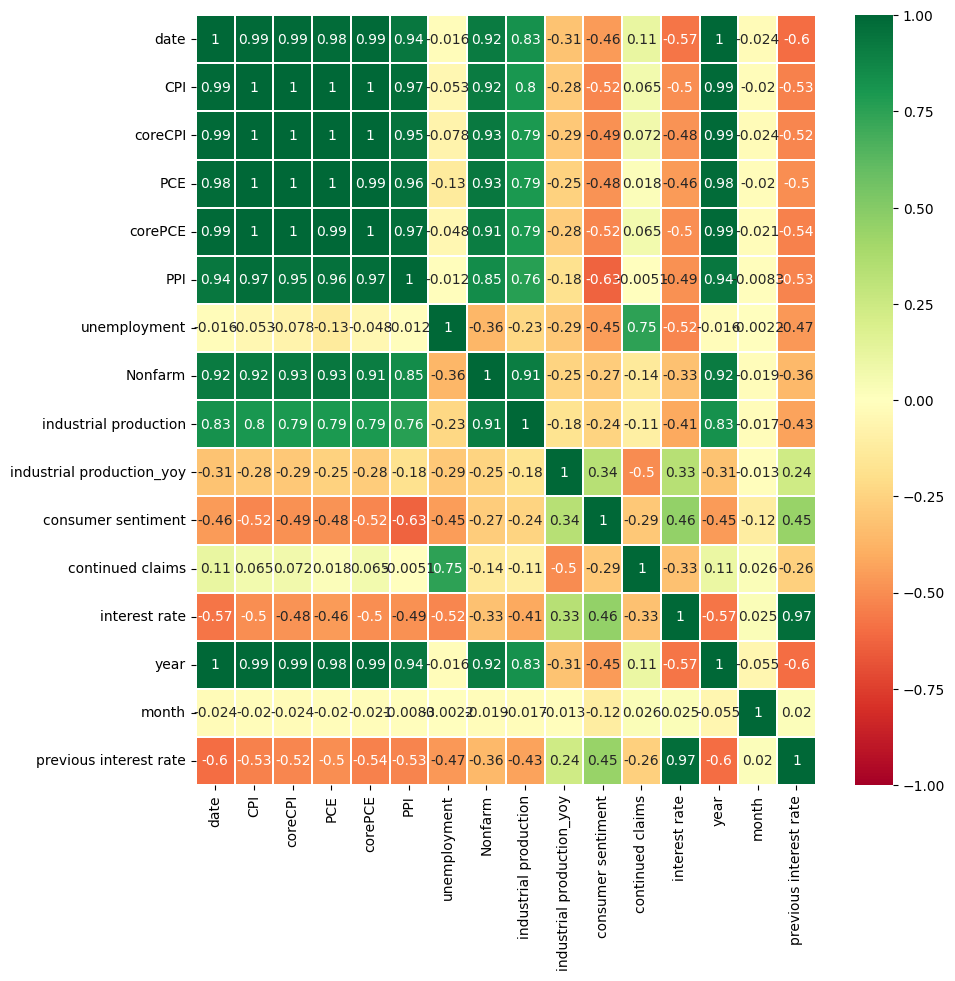

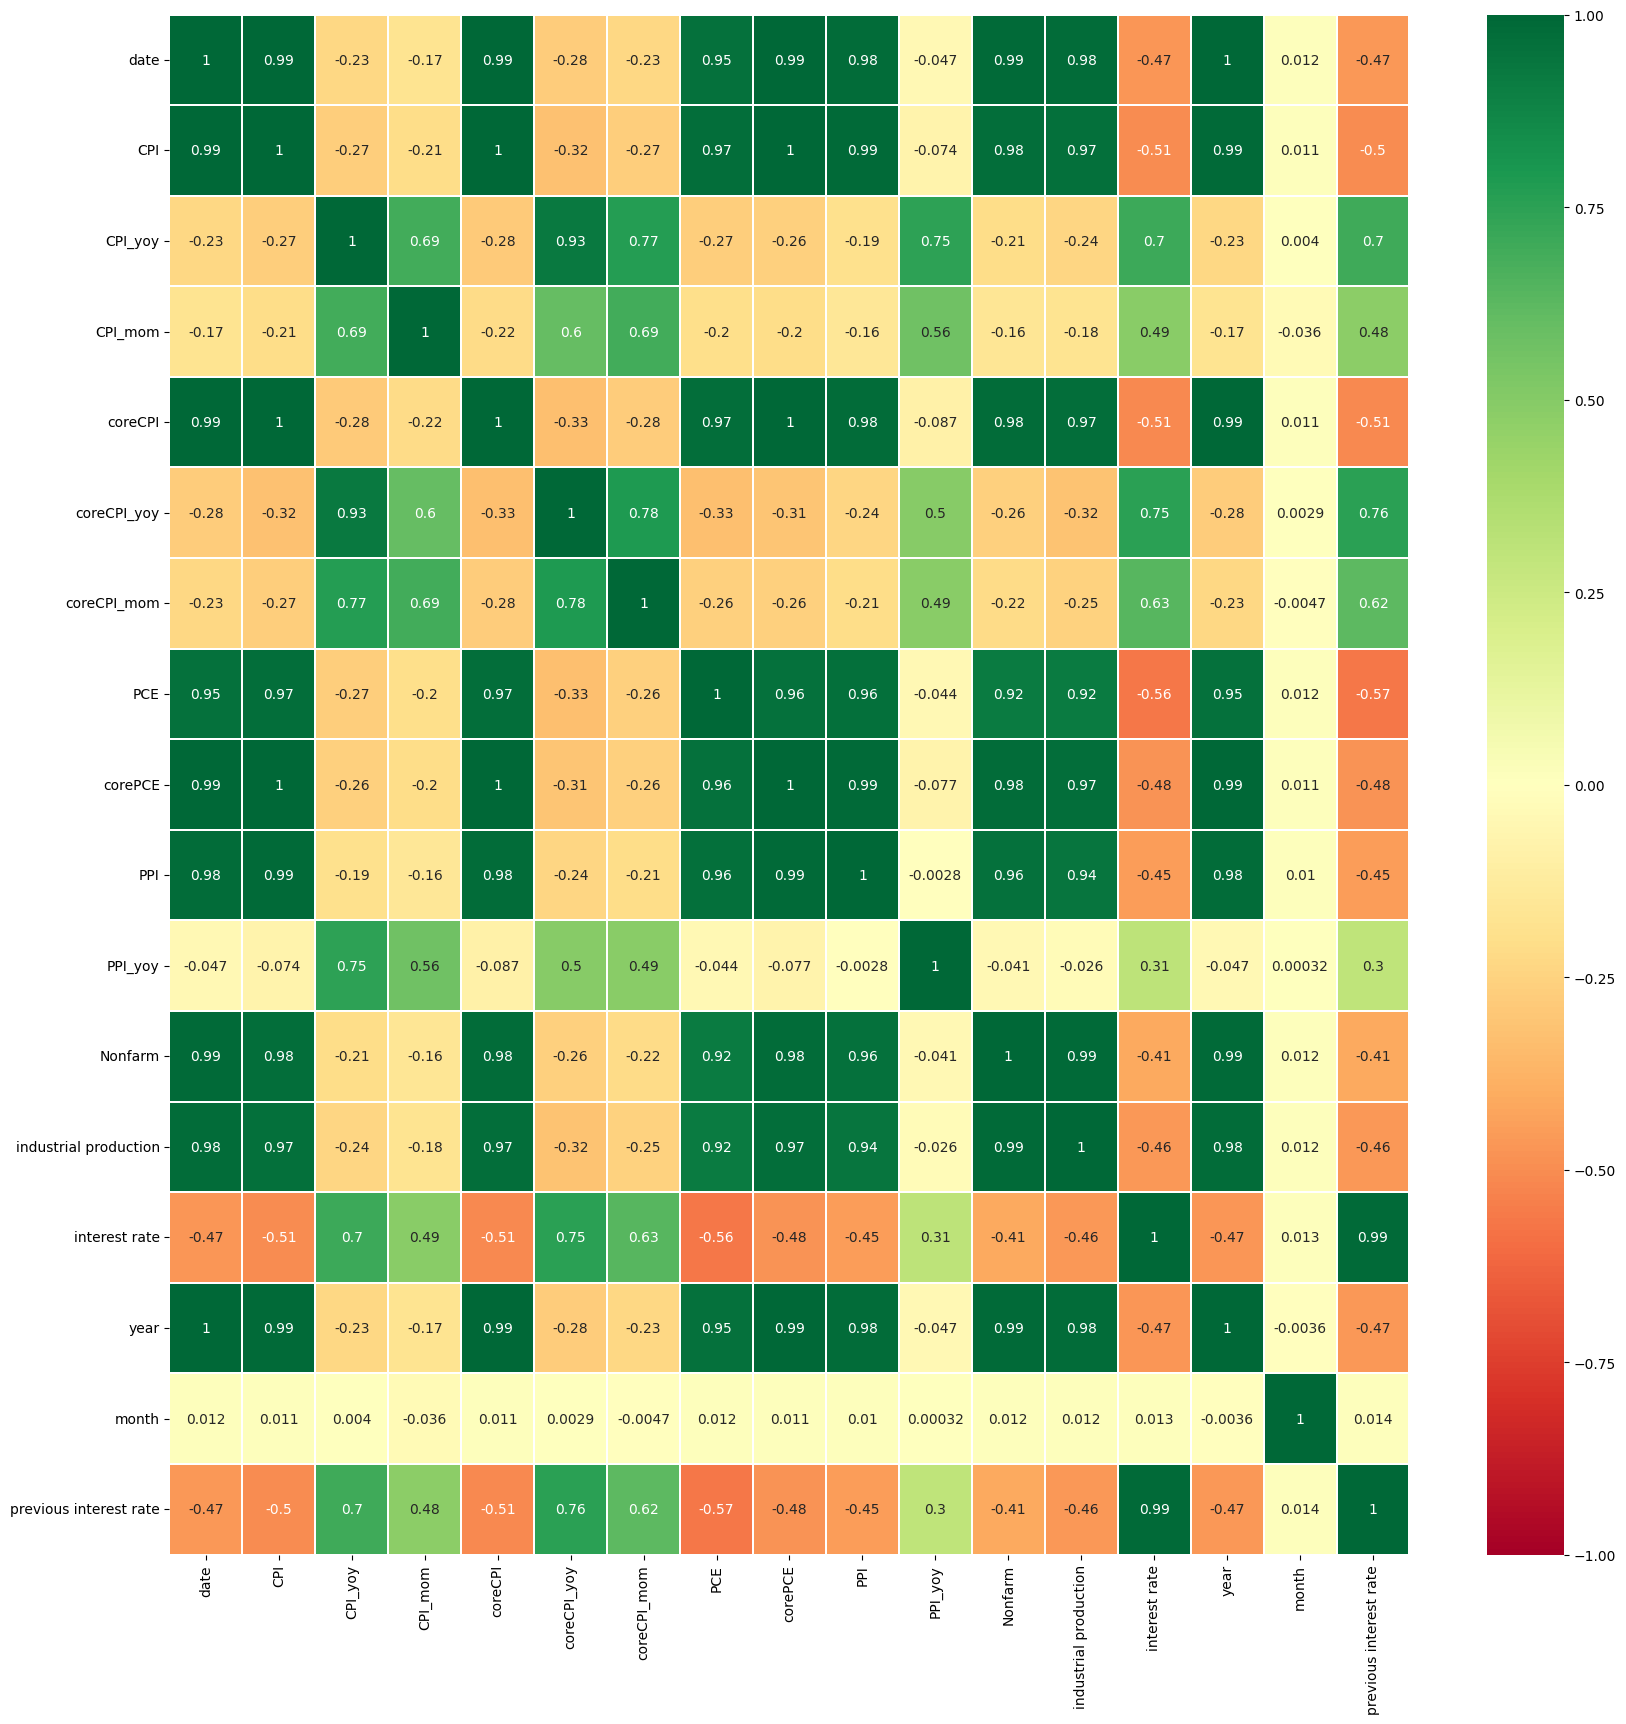

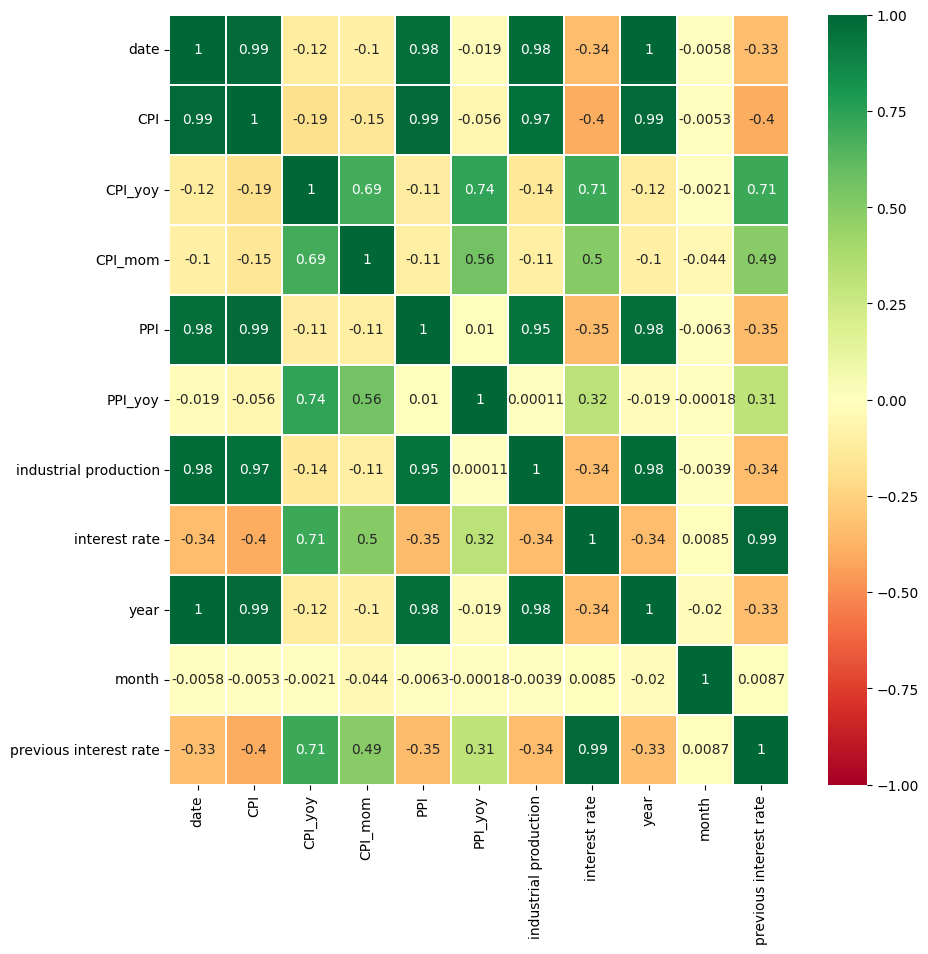

In [34]:
size_dic = {'q1':10, 'q2':20, 'q3':10}


for q, size in size_dic.items():
    temp_df = date_df_dic[q]
    #temp_df = date_df_dic[q].loc[:, date_df_dic[q].columns != 'date']
    fig, ax = plt.subplots(figsize=(size,size)) 
    sns.heatmap(temp_df.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='RdYlGn', ax=ax)
    plt.savefig(f'images/selected_correlation_{q}.png')

#### date 전처리 결과
1. date, year는 interest rate와 거의 동일한 수준의 상관관계를 가진다. => year를 레이블 인코딩하여 모델 input으로 
2. previous interest rate는 0.99의 상관 관계를 가진다. => 스케일링 없이 그대로 모델 input으로 넣겠다. 

- DataPreprocessing 코드를 수정해 반영했다.